In [ ]:
# installing pyspark in Colab 
!pip3 install pyspark


     |████████████████████████████████| 281.4 MB 35 kB/s 
     |████████████████████████████████| 198 kB 51.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=7a87f6fee3dbc61c592682798ae4a24c8a8f90c0b1a3b9eb1e6d5d3e9bfc4475
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [ ]:
# linking with SparkSession
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName('Music genre Statistical Analysis').getOrCreate()

In [ ]:
########## ONLY in Colab ##########
# mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Loading Data from Colab:

########## ONLY in Colab ##########
Music_df = spark.read.option("header", "true").csv("/content/drive/MyDrive/Music_Data")


In [ ]:
# Printing DataFrame 
Music_df.show()

**Distribution of Music Genres Across the data**

In [ ]:
# counting the total number of songs per label
df1=Music_df.select('label').groupBy('label').count().orderBy('count', ascending=False)
df1.show()

+---------+-----+
|    label|count|
+---------+-----+
|     jazz| 1100|
|      pop| 1100|
|    metal| 1100|
|    blues| 1100|
|   reggae| 1100|
|    disco| 1099|
|   hiphop| 1098|
|classical| 1098|
|     rock| 1098|
|  country| 1097|
+---------+-----+



In [ ]:
#calculating the number of rows and columns
row=Music_df.count()
col=len(Music_df.columns)
print(row)
print(col)

10990
60


In [ ]:
import pandas as pd
data1=df1.toPandas()


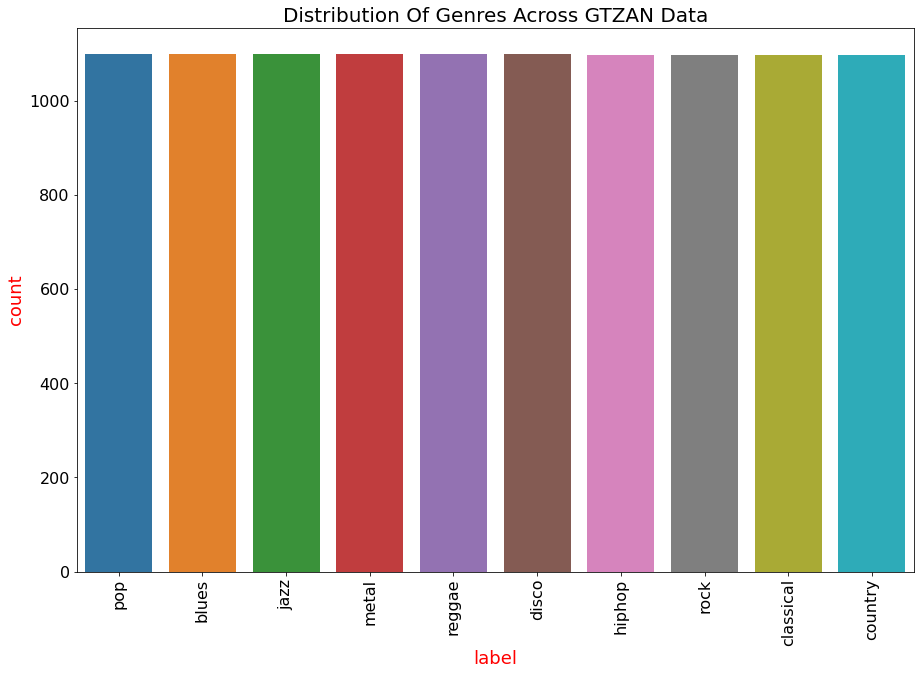

In [ ]:
#plotting the distribution of genres across GTZAN data
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.barplot(x="label",y="count", data=data1)
plt.title('Distribution Of Genres Across GTZAN Data',fontsize=20)
plt.xticks(fontsize=16,rotation=90)
plt.yticks(fontsize=16)
plt.xlabel('label', fontsize=18,color='red')
plt.ylabel('count', fontsize=18,color='red')
plt.show()

**Tempo(Beats per Minute) Distribution Across each Genre**

In [ ]:
from pyspark.sql.types import FloatType
Music = Music_df.withColumn("tempo", Music_df["tempo"].cast(FloatType()))\


In [ ]:
import pandas as pd
df5=Music.toPandas()

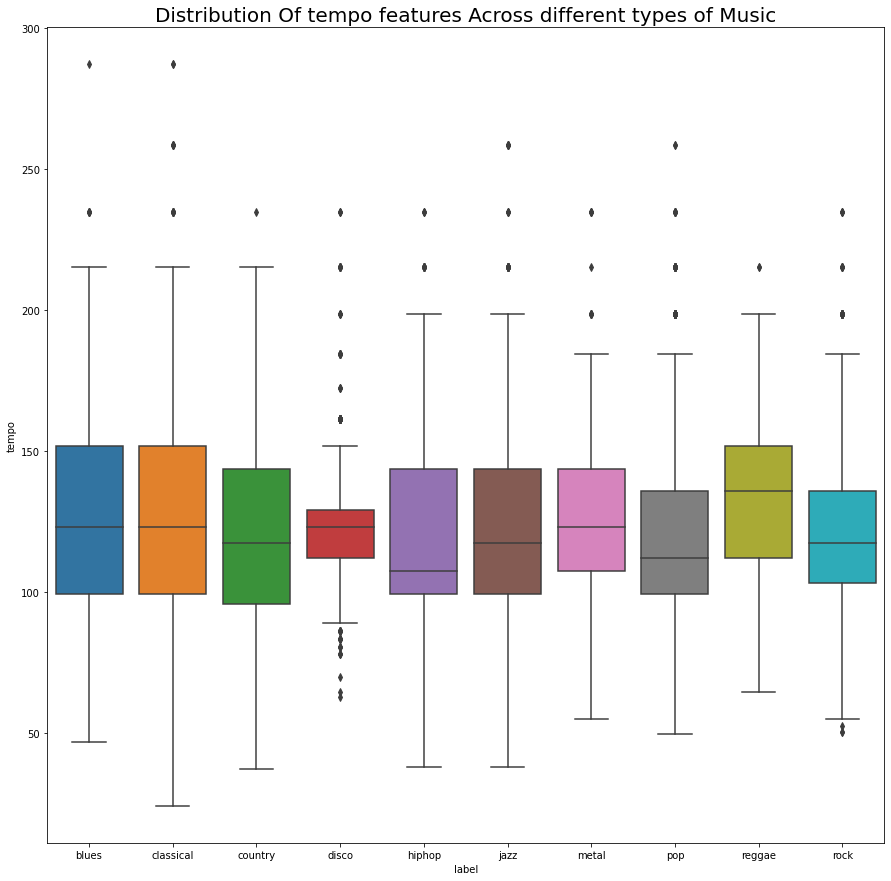

In [ ]:
# plotting tempo feature distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
sns.boxplot(x='label', y='tempo', data=df5)
plt.title('Distribution Of tempo features Across different types of Music',fontsize=20)
plt.show()

**Exploratory Data Analysis (EDA)**

In [ ]:
 #dropping null values
 Music_df.na.drop().show()



In [ ]:
# Displaying all numeric columns
analysis_df= Music_df.drop('filename','label')
analysis_df.show()

In [ ]:
#descriptive statistics of complete dataset
import pandas as pd
analysis_df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
length,10990,120369.36815286624,171382.74909933508,660000,675808
chroma_stft_mean,10990,0.3794565044072295,0.08970086609138196,0.10710775852203369,0.7494807839393616
chroma_stft_var,10990,0.0850093305721079,0.009488442956412735,0.015344750136137009,0.12096428871154785
rms_mean,10990,0.1308654801392321,0.06828701579223356,0.0009534877026453614,0.44256675243377686
rms_var,10990,0.0027105106118011815,0.003591555363730643,0.00010012366692535579,9.968208178179339e-05
spectral_centroid_mean,10990,2199.4525032135502,748.6341180586467,1000.6166557766202,999.0246131967019
spectral_centroid_var,10990,421496.98247522034,432227.78387120244,1000317.4936716071,99979.48027328245
spectral_bandwidth_mean,10990,2241.491064359791,542.2588096430994,1003.5203989868305,997.9280155036064
spectral_bandwidth_var,10990,119982.49073964704,101055.54463132622,100011.77873526365,99992.83323348961


In [ ]:
#checking the data type of each music feature
analysis_df.printSchema()

root
 |-- length: string (nullable = true)
 |-- chroma_stft_mean: string (nullable = true)
 |-- chroma_stft_var: string (nullable = true)
 |-- rms_mean: string (nullable = true)
 |-- rms_var: string (nullable = true)
 |-- spectral_centroid_mean: string (nullable = true)
 |-- spectral_centroid_var: string (nullable = true)
 |-- spectral_bandwidth_mean: string (nullable = true)
 |-- spectral_bandwidth_var: string (nullable = true)
 |-- rolloff_mean: string (nullable = true)
 |-- rolloff_var: string (nullable = true)
 |-- zero_crossing_rate_mean: string (nullable = true)
 |-- zero_crossing_rate_var: string (nullable = true)
 |-- harmony_mean: string (nullable = true)
 |-- harmony_var: string (nullable = true)
 |-- perceptr_mean: string (nullable = true)
 |-- perceptr_var: string (nullable = true)
 |-- tempo: string (nullable = true)
 |-- mfcc1_mean: string (nullable = true)
 |-- mfcc1_var: string (nullable = true)
 |-- mfcc2_mean: string (nullable = true)
 |-- mfcc2_var: string (nullable 

In [ ]:
# A dataframe to extract only classical songs
classical_df = Music_df.filter(Music_df.label == "classical")
classical_df.show()


In [ ]:
#converting the data types from string to float
from pyspark.sql.types import FloatType,DoubleType


changed_classicaldf = classical_df.withColumn("chroma_stft_mean", classical_df[("chroma_stft_mean")].cast(FloatType()))\
.withColumn("chroma_stft_var", classical_df["chroma_stft_var"].cast(FloatType()))\
.withColumn("rms_mean", classical_df["rms_mean"].cast(FloatType()))\
.withColumn("rms_var", classical_df["rms_var"].cast(FloatType()))\
.withColumn("spectral_centroid_mean", classical_df["spectral_centroid_mean"].cast(FloatType()))\
.withColumn("spectral_centroid_var", classical_df["spectral_centroid_var"].cast(FloatType()))\
.withColumn("spectral_bandwidth_mean", classical_df["spectral_bandwidth_mean"].cast(FloatType()))\
.withColumn("spectral_bandwidth_var", classical_df["spectral_bandwidth_var"].cast(FloatType()))\
.withColumn("rolloff_mean", classical_df["rolloff_mean"].cast(FloatType()))\
.withColumn("rolloff_var", classical_df["rolloff_var"].cast(FloatType()))\
.withColumn("zero_crossing_rate_mean", classical_df["zero_crossing_rate_mean"].cast(FloatType()))\
.withColumn("zero_crossing_rate_var", classical_df["zero_crossing_rate_var"].cast(FloatType()))\
.withColumn("harmony_mean", classical_df["harmony_mean"].cast(FloatType()))\
.withColumn("harmony_var", classical_df["harmony_var"].cast(FloatType()))\
.withColumn("perceptr_mean", classical_df["perceptr_mean"].cast(FloatType()))\
.withColumn("perceptr_var", classical_df["perceptr_var"].cast(FloatType()))\
.withColumn("tempo", classical_df["tempo"].cast(FloatType()))\
.withColumn("mfcc1_mean", classical_df["mfcc1_mean"].cast(FloatType()))\
.withColumn("mfcc1_var", classical_df["mfcc1_var"].cast(FloatType()))\
.withColumn("mfcc2_mean", classical_df["mfcc2_mean"].cast(FloatType()))\
.withColumn("mfcc2_var", classical_df["mfcc2_var"].cast(FloatType()))\
.withColumn("mfcc3_mean", classical_df["mfcc3_mean"].cast(FloatType()))\
.withColumn("mfcc3_var", classical_df["mfcc3_var"].cast(FloatType()))\
.withColumn("mfcc4_mean", classical_df["mfcc4_mean"].cast(FloatType()))\
.withColumn("mfcc4_var", classical_df["mfcc4_var"].cast(FloatType()))\
.withColumn("mfcc5_mean", classical_df["mfcc5_mean"].cast(FloatType()))\
.withColumn("mfcc5_var", classical_df["mfcc5_var"].cast(FloatType()))\
.withColumn("mfcc6_mean", classical_df["mfcc6_mean"].cast(FloatType()))\
.withColumn("mfcc6_var", classical_df["mfcc6_var"].cast(FloatType()))\
.withColumn("mfcc7_mean", classical_df["mfcc7_mean"].cast(FloatType()))\
.withColumn("mfcc7_var", classical_df["mfcc7_var"].cast(FloatType()))\
.withColumn("mfcc8_mean", classical_df["mfcc8_mean"].cast(FloatType()))\
.withColumn("mfcc8_var", classical_df["mfcc8_var"].cast(FloatType()))\
.withColumn("mfcc9_mean", classical_df["mfcc9_mean"].cast(FloatType()))\
.withColumn("mfcc9_var", classical_df["mfcc9_var"].cast(FloatType()))\
.withColumn("mfcc10_mean", classical_df["mfcc10_mean"].cast(FloatType()))\
.withColumn("mfcc10_var", classical_df["mfcc10_var"].cast(FloatType()))\
.withColumn("mfcc11_mean", classical_df["mfcc11_mean"].cast(FloatType()))\
.withColumn("mfcc11_var", classical_df["mfcc11_var"].cast(FloatType()))\
.withColumn("mfcc12_mean", classical_df["mfcc12_mean"].cast(FloatType()))\
.withColumn("mfcc12_var", classical_df["mfcc12_var"].cast(FloatType()))\
.withColumn("mfcc13_mean", classical_df["mfcc13_mean"].cast(FloatType()))\
.withColumn("mfcc13_var", classical_df["mfcc13_var"].cast(FloatType()))\
.withColumn("mfcc14_mean", classical_df["mfcc14_mean"].cast(FloatType()))\
.withColumn("mfcc14_var", classical_df["mfcc14_var"].cast(FloatType()))\
.withColumn("mfcc15_mean", classical_df["mfcc15_mean"].cast(FloatType()))\
.withColumn("mfcc15_var", classical_df["mfcc15_var"].cast(FloatType()))\
.withColumn("mfcc16_mean", classical_df["mfcc16_mean"].cast(FloatType()))\
.withColumn("mfcc16_var", classical_df["mfcc16_var"].cast(FloatType()))\
.withColumn("mfcc17_mean", classical_df["mfcc17_mean"].cast(FloatType()))\
.withColumn("mfcc17_var", classical_df["mfcc17_var"].cast(FloatType()))\
.withColumn("mfcc18_mean", classical_df["mfcc18_mean"].cast(FloatType()))\
.withColumn("mfcc18_var", classical_df["mfcc18_var"].cast(FloatType()))\
.withColumn("mfcc19_mean", classical_df["mfcc19_mean"].cast(FloatType()))\
.withColumn("mfcc19_var", classical_df["mfcc19_var"].cast(FloatType()))\
.withColumn("mfcc20_mean", classical_df["mfcc20_mean"].cast(FloatType()))\
.withColumn("mfcc20_var", classical_df["mfcc20_var"].cast(FloatType()))\

In [ ]:
#printing the dataframe after changing the feature
changed_classicaldf.show()

In [ ]:
df1=changed_classicaldf.drop('filename','length','label')
df1.show()

In [ ]:
df1.printSchema()


root
 |-- chroma_stft_mean: float (nullable = true)
 |-- chroma_stft_var: float (nullable = true)
 |-- rms_mean: float (nullable = true)
 |-- rms_var: float (nullable = true)
 |-- spectral_centroid_mean: float (nullable = true)
 |-- spectral_centroid_var: float (nullable = true)
 |-- spectral_bandwidth_mean: float (nullable = true)
 |-- spectral_bandwidth_var: float (nullable = true)
 |-- rolloff_mean: float (nullable = true)
 |-- rolloff_var: float (nullable = true)
 |-- zero_crossing_rate_mean: float (nullable = true)
 |-- zero_crossing_rate_var: float (nullable = true)
 |-- harmony_mean: float (nullable = true)
 |-- harmony_var: float (nullable = true)
 |-- perceptr_mean: float (nullable = true)
 |-- perceptr_var: float (nullable = true)
 |-- tempo: float (nullable = true)
 |-- mfcc1_mean: float (nullable = true)
 |-- mfcc1_var: float (nullable = true)
 |-- mfcc2_mean: float (nullable = true)
 |-- mfcc2_var: float (nullable = true)
 |-- mfcc3_mean: float (nullable = true)
 |-- mfcc3

In [ ]:
#descriptive statistics of classical songs
import pandas as pd

df1.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
chroma_stft_mean,1098,0.26442018051535054,0.06090525445786895,0.11608518,0.73856324
chroma_stft_var,1098,0.08352246129026938,0.005470870908332681,0.038064063,0.11331412
rms_mean,1098,0.042822215685965274,0.04020266710137762,9.534877E-4,0.23632325
rms_var,1098,4.306964748328305E-4,7.608563979208581E-4,4.3795346E-8,0.009556859
spectral_centroid_mean,1098,1351.5531367178605,407.3221358630039,555.23505,3290.4062
spectral_centroid_var,1098,75621.07555707643,112149.30517657395,1367.3071,2015435.9
spectral_bandwidth_mean,1098,1519.7299642371784,306.6759934072135,764.4432,3047.4524
spectral_bandwidth_var,1098,50945.519981287,67463.58867526759,2419.4414,921684.6
rolloff_mean,1098,2476.410369039233,876.8683262527383,658.3363,6837.289


**Descriptive statistics of MFCC features 1 to 20**

In [ ]:
df2=changed_classicaldf.select(  'mfcc1_mean','mfcc1_var', 'mfcc2_mean','mfcc2_var','mfcc3_mean','mfcc3_var','mfcc4_mean','mfcc4_var','mfcc5_mean','mfcc5_var','mfcc6_mean','mfcc6_var','mfcc7_mean','mfcc7_var','mfcc8_mean','mfcc8_var','mfcc9_mean', 'mfcc9_var','mfcc10_mean','mfcc10_var', 'mfcc11_mean','mfcc11_var', 'mfcc12_mean','mfcc12_var', 'mfcc13_mean','mfcc13_var','mfcc14_mean','mfcc14_var', 'mfcc15_mean','mfcc15_var','mfcc16_mean','mfcc16_var','mfcc17_mean','mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean','mfcc20_var').describe()
df2.show()


+-------+------------------+-----------------+-----------------+------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+-----------------+-------------------+-----------------+-------------------+-----------------+--------------------+-----------------+-------------------+-----------------+-----------------+------------------+--------------------+-----------------+------------------+-----------------+------------------+-----------------+-------------------+-----------------+
|summary|        mfcc1_mean|        mfcc1_var|       mfcc2_mean|         mfcc2_var|        mfcc3_mean|         mfcc3_var|       mfcc4_mean|        mfcc4_var|        mfcc5_mean|         mfcc5_var|       mfcc6_mean|        mfcc6_var|       mfc

In [ ]:
import pandas as pd
df2.toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
mfcc1_mean,1098,-323.9300859973296,117.15586931924437,-662.17163,-5.619263
mfcc1_var,1098,2535.847950407282,3143.997631354465,25.190538,45027.375
mfcc2_mean,1098,146.5119269080935,30.30567496166355,38.050766,227.13876
mfcc2_var,1098,414.48173998396686,442.4362181787106,19.262325,4117.313
mfcc3_mean,1098,-23.77382827675706,23.711041701512777,-78.37182,79.53742
mfcc3_var,1098,185.6812099750359,179.78337279478126,14.281029,1689.0701
mfcc4_mean,1098,26.52347511160637,13.54650278845012,-16.35504,59.309967
mfcc4_var,1098,77.67539328868706,56.77611126458415,11.11072,607.6147
mfcc5_mean,1098,-5.124699590944826,10.008578626943,-36.273888,30.336016


**Descriptive statistics of Spectral features and zero crossing rate**

In [ ]:
df3=changed_classicaldf.select('spectral_centroid_mean','spectral_centroid_var','spectral_bandwidth_mean','spectral_bandwidth_var', 'rolloff_mean','rolloff_var','zero_crossing_rate_mean','zero_crossing_rate_var').describe()
df3.show()


+-------+----------------------+---------------------+-----------------------+----------------------+-----------------+------------------+-----------------------+----------------------+
|summary|spectral_centroid_mean|spectral_centroid_var|spectral_bandwidth_mean|spectral_bandwidth_var|     rolloff_mean|       rolloff_var|zero_crossing_rate_mean|zero_crossing_rate_var|
+-------+----------------------+---------------------+-----------------------+----------------------+-----------------+------------------+-----------------------+----------------------+
|  count|                  1098|                 1098|                   1098|                  1098|             1098|              1098|                   1098|                  1098|
|   mean|    1351.5531367178605|    75621.07555707643|     1519.7299642371784|       50945.519981287|2476.410369039233|385797.91921880335|    0.07685048659527183|  5.392258041314055E-4|
| stddev|     407.3221358630039|   112149.30517657395|      306.675993

In [ ]:
import pandas as pd
df3.toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
spectral_centroid_mean,1098,1351.5531367178605,407.3221358630039,555.23505,3290.4062
spectral_centroid_var,1098,75621.07555707643,112149.30517657395,1367.3071,2015435.9
spectral_bandwidth_mean,1098,1519.7299642371784,306.6759934072135,764.4432,3047.4524
spectral_bandwidth_var,1098,50945.519981287,67463.58867526759,2419.4414,921684.6
rolloff_mean,1098,2476.410369039233,876.8683262527383,658.3363,6837.289
rolloff_var,1098,385797.91921880335,691397.8912980427,3679.12,1.2983204E7
zero_crossing_rate_mean,1098,0.07685048659527183,0.030854153746712375,0.019535005,0.19210486
zero_crossing_rate_var,1098,5.392258041314055E-4,5.834513604033732E-4,7.978713E-6,0.0045241453


**Correlation between mean variables**

In [ ]:
# Computing the Correlation Matrix of mean variables
selected_columns = [col for col in df1.columns if 'mean' in col]
selected_features_df=df1.select(selected_columns)
selected_features_df.show()

In [ ]:
selected_features_df.corr('spectral_centroid_mean','spectral_bandwidth_mean')

0.7942905265374315

In [ ]:
selected_features_df.corr('rolloff_mean','spectral_bandwidth_mean')

0.8402935336098101

In [ ]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# Convert the desired column to vector column first
vector_col = "correlation_features"
assemble = VectorAssembler(inputCols=selected_features_df.columns, outputCol=vector_col)
dataframe_vector = assemble.transform(selected_features_df).select(vector_col)
dataframe_vector.show()

+--------------------+
|correlation_features|
+--------------------+
|[0.25533056259155...|
|[0.23143129050731...|
|[0.22545836865901...|
|[0.26086553931236...|
|[0.26961103081703...|
|[0.24319399893283...|
|[0.29604682326316...|
|[0.28604230284690...|
|[0.21258942782878...|
|[0.23817683756351...|
|[0.28942707180976...|
|[0.23223337531089...|
|[0.24493956565856...|
|[0.20167170464992...|
|[0.15748310089111...|
|[0.22408005595207...|
|[0.17559003829956...|
|[0.21928933262825...|
|[0.19055895507335...|
|[0.19925560057163...|
+--------------------+
only showing top 20 rows



In [ ]:
# Defining the pearson corrrelation matrix 
Corr_matrix = Correlation.corr(dataframe_vector, vector_col)

# Printing the correlation matrix
correlation = Corr_matrix.collect()[0][Corr_matrix.columns[0]].toArray()


print(correlation)

In [ ]:
selected_features_df.columns

['chroma_stft_mean',
 'rms_mean',
 'spectral_centroid_mean',
 'spectral_bandwidth_mean',
 'rolloff_mean',
 'zero_crossing_rate_mean',
 'harmony_mean',
 'perceptr_mean',
 'mfcc1_mean',
 'mfcc2_mean',
 'mfcc3_mean',
 'mfcc4_mean',
 'mfcc5_mean',
 'mfcc6_mean',
 'mfcc7_mean',
 'mfcc8_mean',
 'mfcc9_mean',
 'mfcc10_mean',
 'mfcc11_mean',
 'mfcc12_mean',
 'mfcc13_mean',
 'mfcc14_mean',
 'mfcc15_mean',
 'mfcc16_mean',
 'mfcc17_mean',
 'mfcc18_mean',
 'mfcc19_mean',
 'mfcc20_mean']

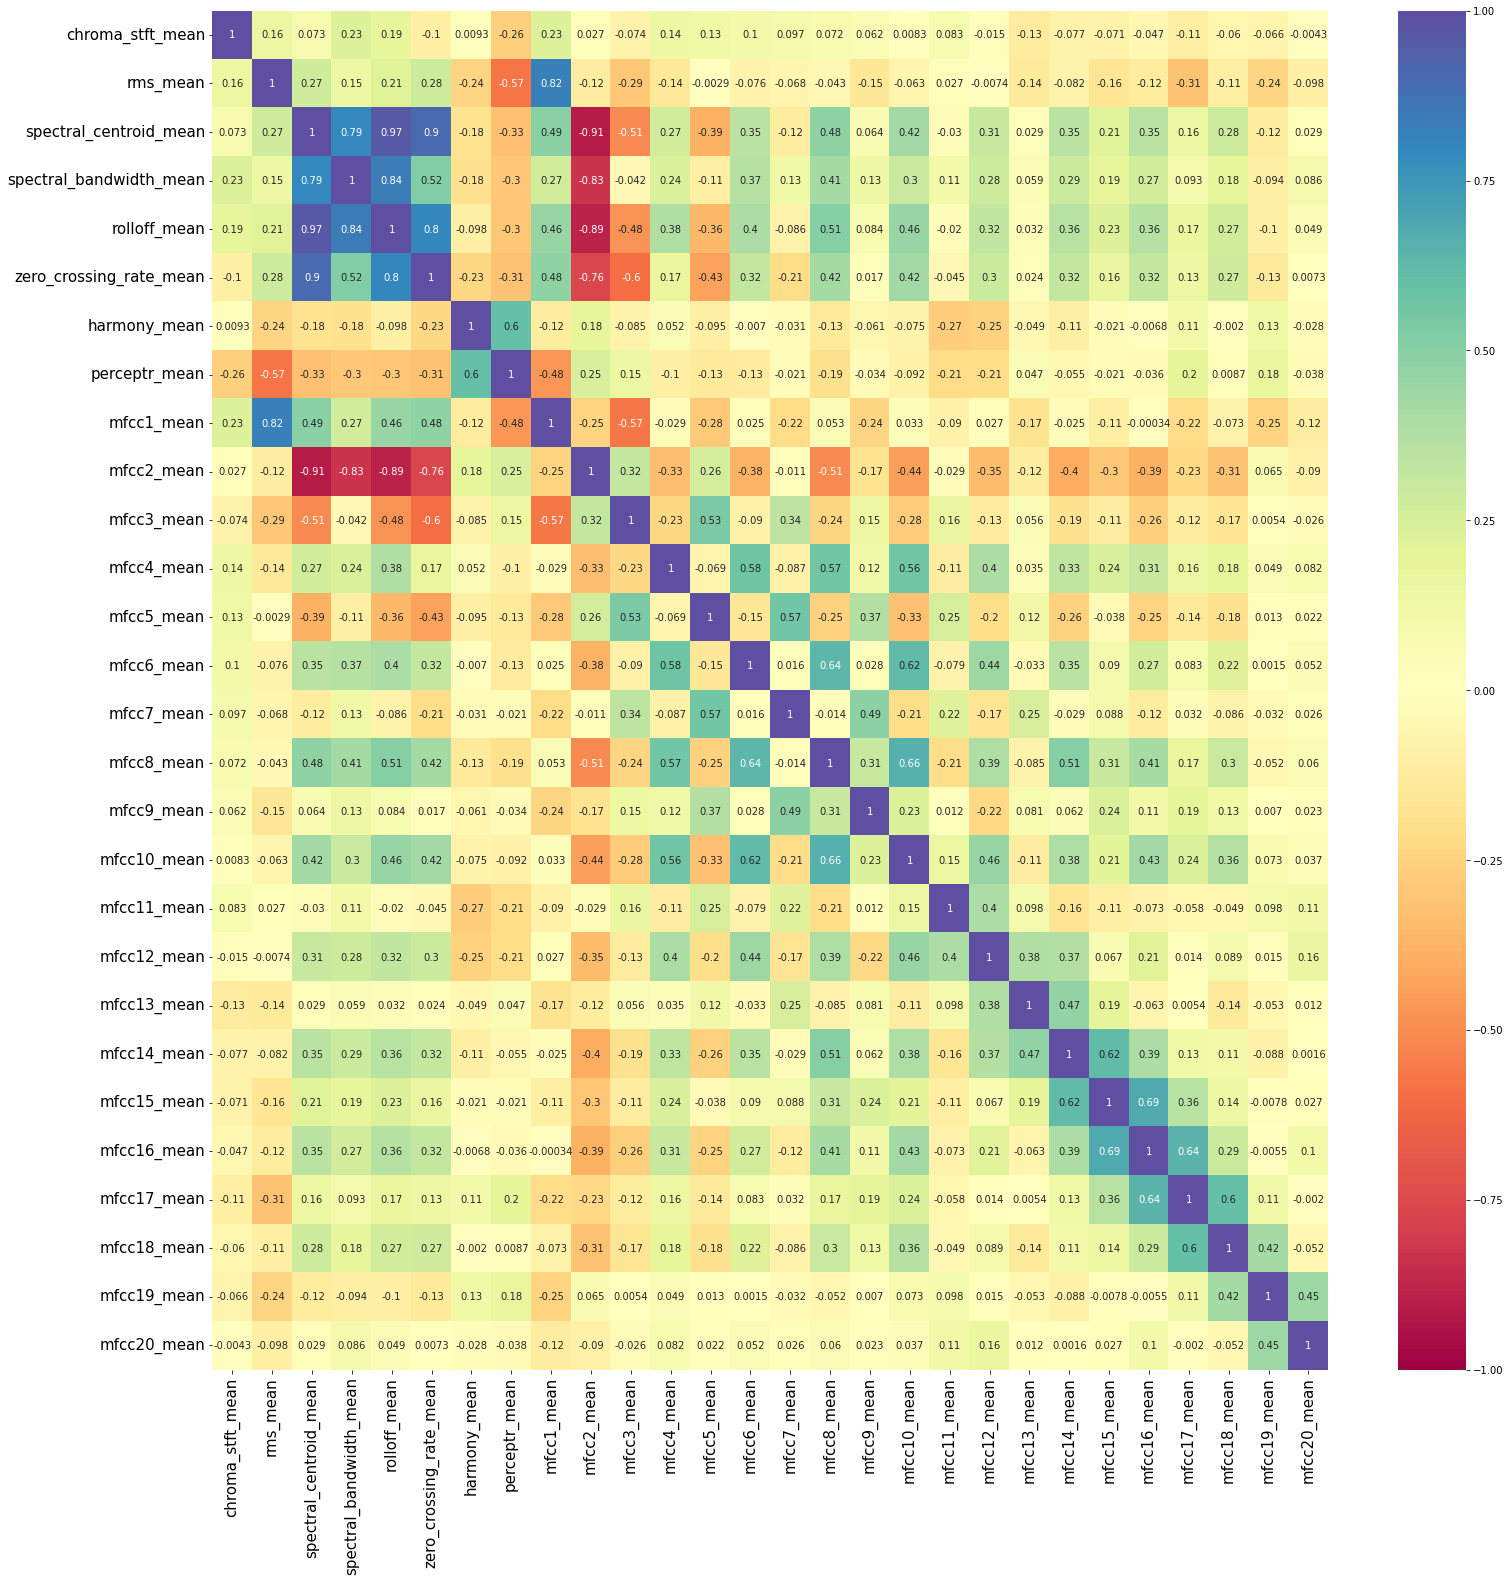

In [ ]:
#demonstrating correlation between mean columns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig = plt.figure(figsize=(25, 25))
x_axis_labels = ['chroma_stft_mean','rms_mean','spectral_centroid_mean','spectral_bandwidth_mean','rolloff_mean','zero_crossing_rate_mean','harmony_mean','perceptr_mean','mfcc1_mean','mfcc2_mean','mfcc3_mean','mfcc4_mean','mfcc5_mean','mfcc6_mean','mfcc7_mean','mfcc8_mean','mfcc9_mean','mfcc10_mean','mfcc11_mean','mfcc12_mean','mfcc13_mean','mfcc14_mean','mfcc15_mean','mfcc16_mean','mfcc17_mean','mfcc18_mean','mfcc19_mean','mfcc20_mean'] # labels for x-axis
y_axis_labels = ['chroma_stft_mean','rms_mean','spectral_centroid_mean','spectral_bandwidth_mean','rolloff_mean','zero_crossing_rate_mean','harmony_mean','perceptr_mean','mfcc1_mean','mfcc2_mean','mfcc3_mean','mfcc4_mean','mfcc5_mean','mfcc6_mean','mfcc7_mean','mfcc8_mean','mfcc9_mean','mfcc10_mean','mfcc11_mean','mfcc12_mean','mfcc13_mean','mfcc14_mean','mfcc15_mean','mfcc16_mean','mfcc17_mean','mfcc18_mean','mfcc19_mean','mfcc20_mean'] # labels for y-axis
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = False
sns.heatmap(correlation,xticklabels=x_axis_labels, yticklabels=y_axis_labels,cmap='Spectral', mask=mask, annot=True, vmin=-1, vmax=1)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)

#sns.heatmap(correlation, annot=True, cmap='GnBu_r', center=1)
plt.savefig("abc.png")
plt.show()

**Correlation among Spectral features**

In [ ]:
selected_features_df1=Music_df.select('spectral_centroid_mean','spectral_centroid_var','spectral_bandwidth_mean','spectral_bandwidth_var','rolloff_mean','rolloff_var','label')
selected_features_df1.show()

In [ ]:
# changing string data type to numeric data type
from pyspark.ml.feature import StringIndexer


labelIndexer = StringIndexer(inputCol='label',outputCol='MusicGenre')
changed_classificationdf1=labelIndexer.fit(selected_features_df1).transform(selected_features_df1)

changed_classificationdf1.show()

In [ ]:
#converting the data types from string to float
from pyspark.sql.types import IntegerType 

changed_classicaldf2 = changed_classificationdf1.withColumn("spectral_centroid_mean", changed_classificationdf1["spectral_centroid_mean"].cast(IntegerType()))\
.withColumn("spectral_centroid_var", changed_classificationdf1["spectral_centroid_var"].cast(IntegerType()))\
.withColumn("spectral_bandwidth_mean", changed_classificationdf1["spectral_bandwidth_mean"].cast(IntegerType()))\
.withColumn("spectral_bandwidth_var", changed_classificationdf1["spectral_bandwidth_var"].cast(IntegerType()))\
.withColumn("rolloff_mean", changed_classificationdf1["rolloff_mean"].cast(IntegerType()))\
.withColumn("rolloff_var", changed_classificationdf1["rolloff_var"].cast(IntegerType()))\
.withColumn("MusicGenre", changed_classificationdf1["MusicGenre"].cast(IntegerType()))\

In [ ]:
selected_features_df=changed_classicaldf2.select('spectral_centroid_mean','spectral_centroid_var','spectral_bandwidth_mean','spectral_bandwidth_var','rolloff_mean','rolloff_var','label','MusicGenre')
selected_features_df.show()

In [ ]:
changed_classicaldf2=changed_classicaldf2.drop('label')
changed_classicaldf2.show()

In [ ]:
features=['spectral_centroid_mean','spectral_centroid_var','spectral_bandwidth_mean','spectral_bandwidth_var','rolloff_mean','rolloff_var','MusicGenre']

In [ ]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# Convert the desired column to vector column first

assemble = VectorAssembler(inputCols=features, outputCol="selected features")
assemble_vector = assemble.transform(changed_classicaldf2)
final_vector_df = assemble_vector.select("selected features", "MusicGenre")
final_vector_df.show()

+--------------------+----------+
|   selected features|MusicGenre|
+--------------------+----------+
|[1773.0,167541.0,...|         0|
|[1816.0,90525.0,2...|         0|
|[1788.0,111407.0,...|         0|
|[1655.0,111952.0,...|         0|
|[1630.0,79667.0,1...|         0|
|[1994.0,211700.0,...|         0|
|[1962.0,177443.0,...|         0|
|[1701.0,35678.0,1...|         0|
|[1746.0,138073.0,...|         0|
|[1763.0,61493.0,1...|         0|
|[1279.0,406513.0,...|         0|
|[1513.0,214768.0,...|         0|
|[1308.0,154209.0,...|         0|
|[1479.0,646868.0,...|         0|
|[1729.0,568827.0,...|         0|
|[1492.0,228951.0,...|         0|
|[1571.0,257630.0,...|         0|
|[1877.0,510311.0,...|         0|
|[1665.0,239973.0,...|         0|
|[1373.0,210606.0,...|         0|
+--------------------+----------+
only showing top 20 rows



In [ ]:
# Defining the pearson corrrelation matrix 
Corr_matrix = Correlation.corr(assemble_vector,"selected features")
# Printing the correlation matrix
correlation = Corr_matrix.collect()[0][Corr_matrix.columns[0]].toArray()
#final_vector_df.corr('selected features','MusicGenre')

print(correlation)

[[ 1.          0.480198    0.89155865  0.02033026  0.97480032  0.17441829
  -0.01097891]
 [ 0.480198    1.          0.56154972  0.61664649  0.49689805  0.78342647
   0.07568021]
 [ 0.89155865  0.56154972  1.          0.22323873  0.95143737  0.40905417
   0.00906533]
 [ 0.02033026  0.61664649  0.22323873  1.          0.06867441  0.89098093
   0.09536004]
 [ 0.97480032  0.49689805  0.95143737  0.06867441  1.          0.23973649
  -0.01441139]
 [ 0.17441829  0.78342647  0.40905417  0.89098093  0.23973649  1.
   0.0668935 ]
 [-0.01097891  0.07568021  0.00906533  0.09536004 -0.01441139  0.0668935
   1.        ]]


/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


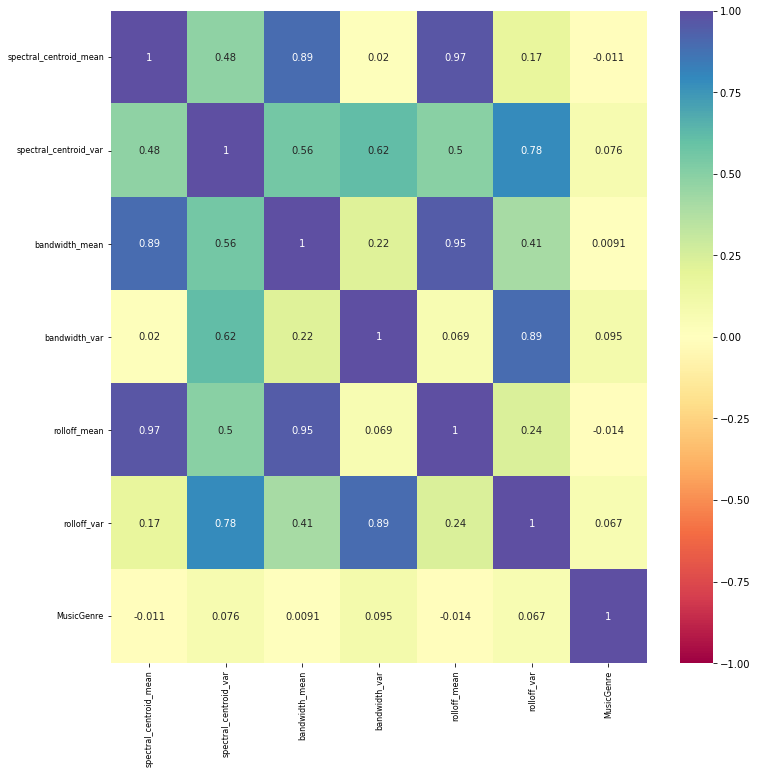

In [ ]:
#demonstrating correlation between mean columns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig = plt.figure(figsize=(12, 12))
x_axis_labels = ['spectral_centroid_mean','spectral_centroid_var','bandwidth_mean','bandwidth_var','rolloff_mean','rolloff_var','MusicGenre'] # labels for x-axis
y_axis_labels = ['spectral_centroid_mean','spectral_centroid_var','bandwidth_mean','bandwidth_var','rolloff_mean','rolloff_var','MusicGenre'] # labels for y-axis
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = False
sns.heatmap(correlation,xticklabels=x_axis_labels, yticklabels=y_axis_labels,cmap='Spectral', mask=mask, annot=True, vmin=-1, vmax=1)
plt.xticks(fontsize =8)
plt.yticks(rotation=0,fontsize =8)

#sns.heatmap(correlation, annot=True, cmap='GnBu_r', center=1)
plt.savefig("target.png")
plt.show()

**Correlation between MFCC features**

In [ ]:
selected_features_df2=Music_df.select('mfcc18_mean', 'mfcc18_var','mfcc19_mean','mfcc19_var','mfcc20_mean','mfcc20_var','label')
selected_features_df2.show()

In [ ]:
# changing string data type to numeric data type
from pyspark.ml.feature import StringIndexer


labelIndexer = StringIndexer(inputCol='label',outputCol='MusicGenre')
changed_mfccdf2=labelIndexer.fit(selected_features_df2).transform(selected_features_df2)

changed_mfccdf2.show()

In [ ]:
#converting the data types from string to float
from pyspark.sql.types import IntegerType 

changed_mfccdf3 = changed_mfccdf2.withColumn("mfcc18_mean", changed_mfccdf2["mfcc18_mean"].cast(IntegerType()))\
.withColumn("mfcc18_var", changed_mfccdf2["mfcc18_var"].cast(IntegerType()))\
.withColumn("mfcc19_mean", changed_mfccdf2["mfcc19_mean"].cast(IntegerType()))\
.withColumn("mfcc19_var", changed_mfccdf2["mfcc19_var"].cast(IntegerType()))\
.withColumn("mfcc20_mean", changed_mfccdf2["mfcc20_mean"].cast(IntegerType()))\
.withColumn("mfcc20_var", changed_mfccdf2["mfcc20_var"].cast(IntegerType()))\
.withColumn("MusicGenre", changed_mfccdf2["MusicGenre"].cast(IntegerType()))\

In [ ]:
changed_mfccdf4=changed_mfccdf3.drop('label')
changed_mfccdf4.show()

In [ ]:
features=['mfcc18_mean', 'mfcc18_var','mfcc19_mean','mfcc19_var','mfcc20_mean','mfcc20_var','MusicGenre']

In [ ]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# Convert the desired column to vector column first

assemble = VectorAssembler(inputCols=features, outputCol="selected features")
assemble_vector = assemble.transform(changed_mfccdf4)
final_vector_df = assemble_vector.select("selected features", "MusicGenre")
final_vector_df.show()

+--------------------+----------+
|   selected features|MusicGenre|
+--------------------+----------+
|[0.0,38.0,-5.0,33...|         0|
|[0.0,51.0,-2.0,97...|         0|
|[2.0,45.0,-1.0,53...|         0|
|[1.0,34.0,-3.0,50...|         0|
|[1.0,51.0,-3.0,26...|         0|
|[0.0,40.0,-3.0,32...|         0|
|[1.0,47.0,-3.0,39...|         0|
|[0.0,26.0,-2.0,23...|         0|
|[2.0,33.0,-2.0,80...|         0|
|[0.0,41.0,-7.0,96...|         0|
|(7,[1,3,5],[19.0,...|         0|
|[-2.0,28.0,0.0,40...|         0|
|[4.0,70.0,-1.0,10...|         0|
|[-1.0,34.0,-4.0,2...|         0|
|[0.0,71.0,-3.0,50...|         0|
|[0.0,45.0,0.0,28....|         0|
|[0.0,31.0,-3.0,60...|         0|
|[1.0,45.0,-1.0,63...|         0|
|[6.0,45.0,6.0,33....|         0|
|[3.0,32.0,0.0,20....|         0|
+--------------------+----------+
only showing top 20 rows



In [ ]:
# Defining the pearson corrrelation matrix 
Corr_matrix = Correlation.corr(assemble_vector,"selected features")
# Printing the correlation matrix
correlation = Corr_matrix.collect()[0][Corr_matrix.columns[0]].toArray()
#final_vector_df.corr('selected features','MusicGenre')

print(correlation)

[[ 1.          0.19528621  0.28501508  0.16451107  0.2665938   0.10862918
   0.03628801]
 [ 0.19528621  1.          0.24234868  0.66306333  0.06748225  0.54751237
  -0.09240828]
 [ 0.28501508  0.24234868  1.          0.26456831  0.37471014  0.22753043
  -0.00551658]
 [ 0.16451107  0.66306333  0.26456831  1.          0.12103176  0.67706905
  -0.10426607]
 [ 0.2665938   0.06748225  0.37471014  0.12103176  1.          0.09480866
  -0.03487392]
 [ 0.10862918  0.54751237  0.22753043  0.67706905  0.09480866  1.
  -0.0821393 ]
 [ 0.03628801 -0.09240828 -0.00551658 -0.10426607 -0.03487392 -0.0821393
   1.        ]]


/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


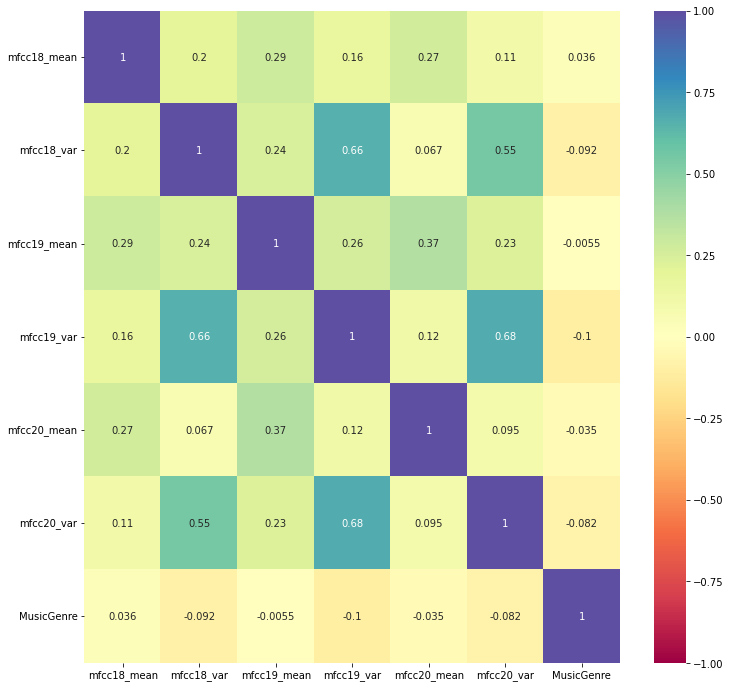

In [ ]:
#demonstrating correlation between mean columns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig = plt.figure(figsize=(12, 12))
x_axis_labels = ['mfcc18_mean', 'mfcc18_var','mfcc19_mean','mfcc19_var','mfcc20_mean','mfcc20_var','MusicGenre'] # labels for x-axis
y_axis_labels = ['mfcc18_mean', 'mfcc18_var','mfcc19_mean','mfcc19_var','mfcc20_mean','mfcc20_var','MusicGenre'] # labels for y-axis
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = False
sns.heatmap(correlation,xticklabels=x_axis_labels, yticklabels=y_axis_labels,cmap='Spectral', mask=mask, annot=True, vmin=-1, vmax=1)
plt.xticks(fontsize =10)
plt.yticks(rotation=0,fontsize =10)

#sns.heatmap(correlation, annot=True, cmap='GnBu_r', center=1)
plt.savefig("target1.png")
plt.show()

In [ ]:
# install nbconvert
!pip3 install nbconvert

# convert ipynb to html
# file name: "MusicAnalysis1_Mousumi.ipynb
!jupyter nbconvert --to html MusicAnalysis1_Mousumi.ipynb
